<a href="https://colab.research.google.com/github/onti-veros/ACTIVIDADES_1946969/blob/main/A3_red_neuronal_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A3: Entrenamiento de Red Neuronal Artificial simple.

Yessica Sarahi Ontiveros Farrera 1946969 Grupo 007 N1



> Entrenar una red neuronal artificial en el conjunto de datos MNIST basándose en el ejemplo que se discutió en clase.



Se colocan las librerias necesarias para la red

In [2]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


Se carga el set de datos de mnist 

In [3]:
from keras.datasets import mnist

In [16]:
(entren_imagenes, entren_etiquetas), (test_imagenes, test_etiquetas) = mnist.load_data()

Se explora el set de datos para ver con que se está trabajando.

In [5]:
entren_imagenes.shape

(60000, 28, 28)

In [6]:
len(entren_imagenes)

60000

In [7]:
entren_imagenes.dtype

dtype('uint8')

In [8]:
test_imagenes.shape 

(10000, 28, 28)

In [9]:
len(test_imagenes)

10000

In [10]:
test_imagenes.dtype

dtype('uint8')

In [11]:
len(test_etiquetas)

10000

Se visualiza un ejemplo del set de datos, en este caso la imagen numero 7000 resulta ser un 8.

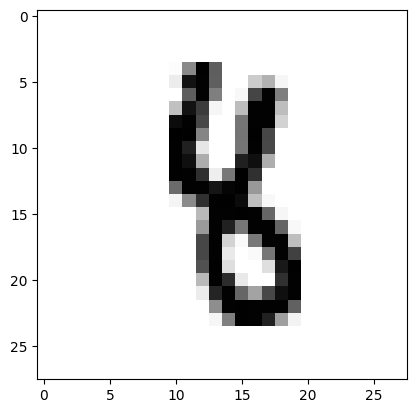

In [12]:
plt.imshow(entren_imagenes[7000], cmap=plt.cm.binary)

In [13]:
print(entren_etiquetas[7000])

8


Ya que las imagenes se encuentran en escala de grises desde un inicio, no se necesitan pre-procesarse, por lo que directamente normalizamos los datos. 

In [17]:
entren_imagenes=entren_imagenes / 255.0 
test_imagenes=test_imagenes / 255.0

Se despliegan las primeras 25 imagenes de un set con sus etiquetas correspondientes

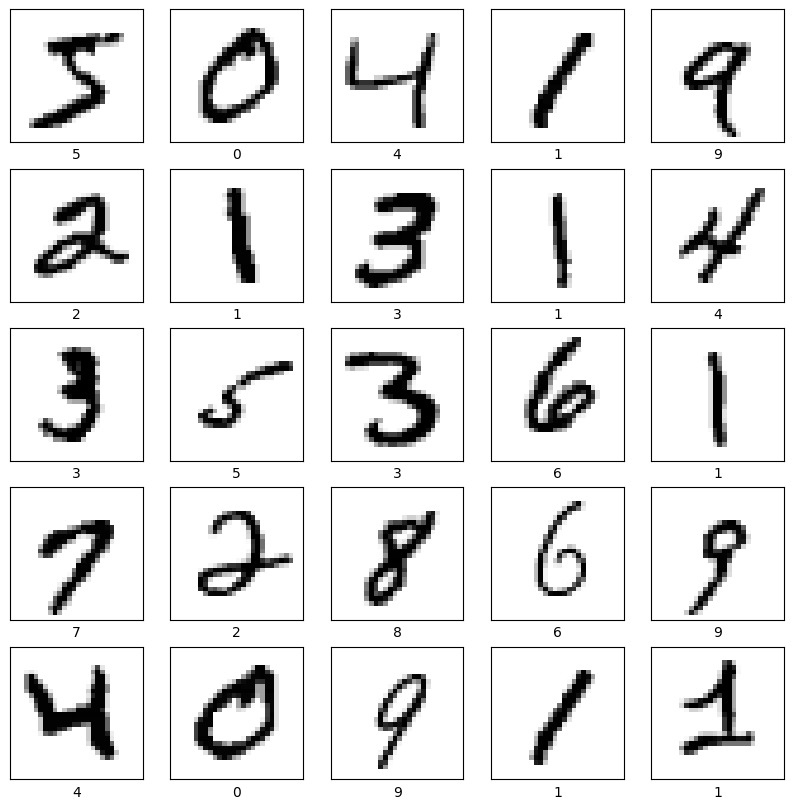

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(entren_imagenes[i], cmap=plt.cm.binary)
    plt.xlabel(entren_etiquetas[i])
plt.show()

Se crea un arreglo bidimensional de dos capas. La primera con 128 neuronas y la segunda de 10 nodos.

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Se compila el model 

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Se llama al método model.fit 

In [21]:
model.fit(entren_imagenes, entren_etiquetas, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2569 - accuracy: 0.9267
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1098 - accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0763 - accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0565 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0441 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0336 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0275 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0233 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0170 - accuracy: 0.9951
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

Comparamos la exactitud del modelo sobre el test de datos.

In [22]:
test_loss, test_acc = model.evaluate(test_imagenes,  test_etiquetas, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0755 - accuracy: 0.9783 - 462ms/epoch - 1ms/step

Test accuracy: 0.9782999753952026


Podemos notar un ligero *overfitting* debido a la diminución en eficiencia de un 0.02% comparado con los resultados obtenidos en el entrenamiento. 

Ya entrenado, podemos hacer que el modelo ejecute predicciones en el set de prueba

In [23]:
predictions = model.predict(test_imagenes)

313/313 [==============================] - 0s 1ms/step


Visualizamos la predicción de la primera imagen 

In [24]:
predictions[0]

array([4.6918769e-10, 5.1616128e-11, 6.2129679e-09, 1.1007920e-05,
       8.5082786e-14, 1.0470501e-08, 2.9294706e-15, 9.9998885e-01,
       1.8864198e-10, 1.7558057e-07], dtype=float32)

Extraemos el valor más probable del arreglo.

In [25]:
np.argmax(predictions[0])

7

Y examinamos la etiqueta correspondiente para ver si la predicción fue correcta.

In [26]:
test_etiquetas[0]

7

En efecto, la imagen de la predicción corresponde a un siete. 

Se crea una grafica para poder visualizar todo el set. 

In [27]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],
                                100*np.max(predictions_array),
                               [true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

A continuación se muestran dos imagenes con sus predicciones y arreglo de predicciones.

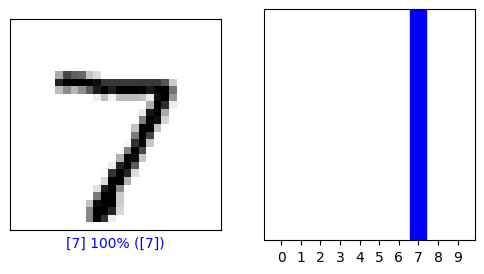

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_etiquetas, test_imagenes)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_etiquetas)
plt.show()

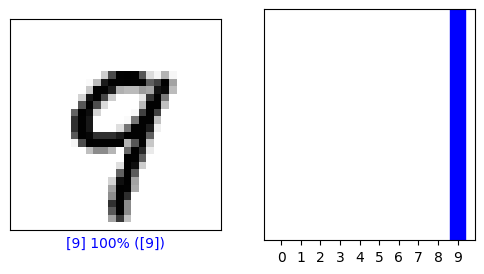

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_etiquetas, test_imagenes)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_etiquetas)
plt.show()

Como resultado final se muestra un arreglo de 5x3 de las imagenes de prueba junto con sus predicciones. 

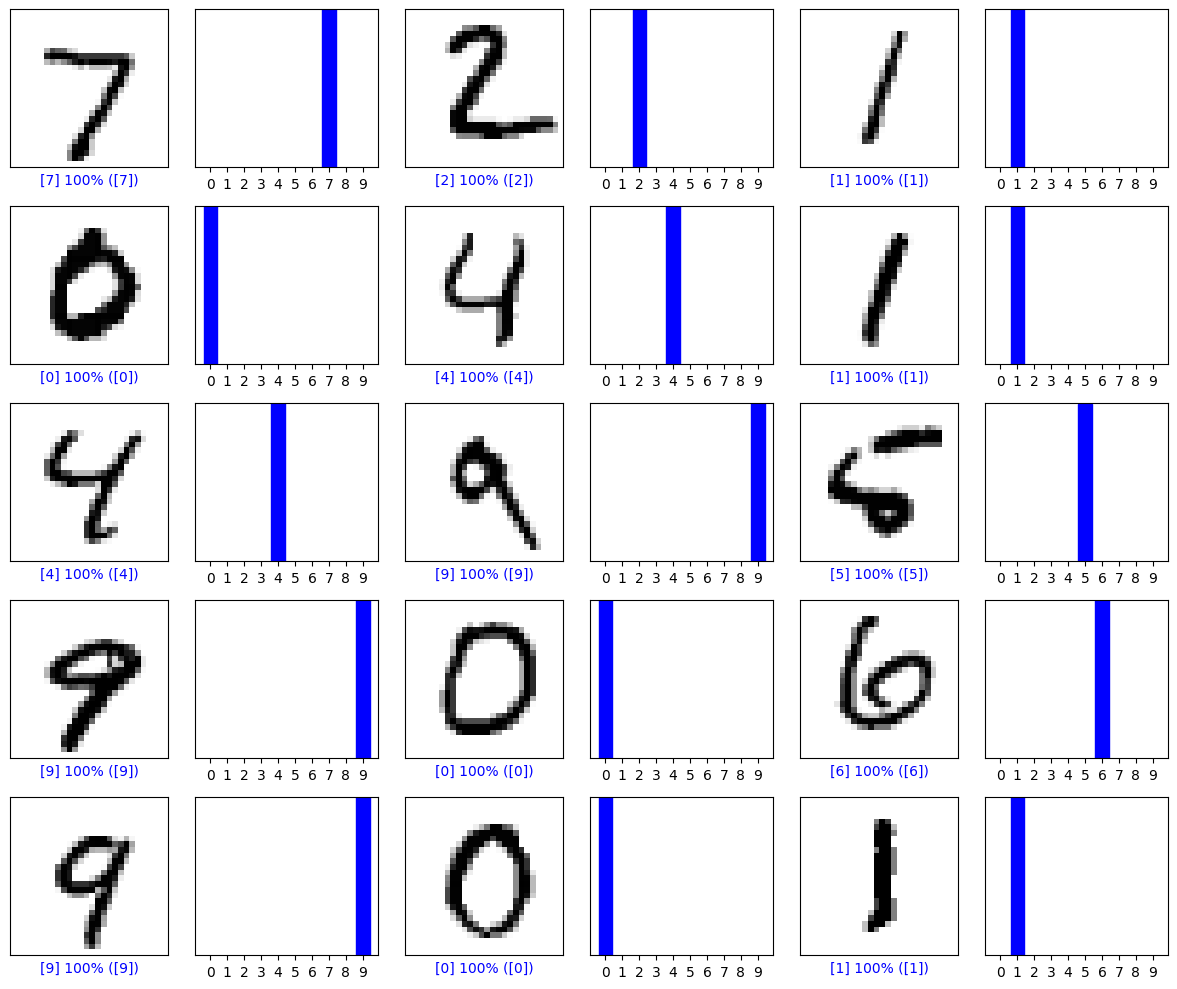

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_etiquetas, test_imagenes)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_etiquetas)
plt.tight_layout()
plt.show()

También se muestra el uso del modelo para predecir una sola imagen 

In [31]:
img = test_imagenes[1]

print(img.shape)

(28, 28)


In [32]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 16ms/step
[[9.63961875e-13 1.09545635e-08 1.00000000e+00 1.64484010e-10
  3.22766037e-21 8.41558281e-11 5.82221207e-12 4.47187507e-20
  5.14047083e-10 1.01225764e-17]]


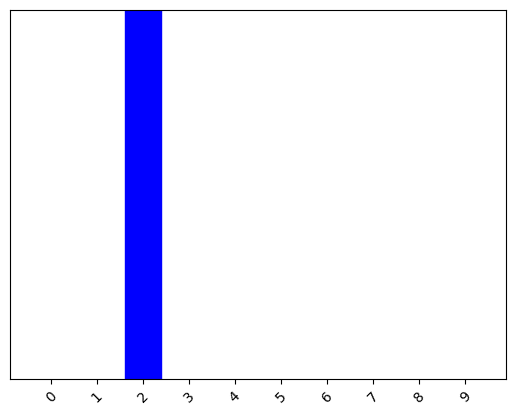

In [34]:
plot_value_array(1, predictions_single[0], test_etiquetas)
_ = plt.xticks(range(10), rotation=45)

In [35]:
np.argmax(predictions_single[0])

2